# Loan Data
## By Dolu Solana

## Introduction

In this project we would conduct analysis loan data gotten from Prosper Loans, a San Francisco based peer-to-peer loaning app. We intend to understand:

1. How interest rates vary across the data.
2. The percentage of defaults
3. How regular credit scores differ Prospers custom scores.
4. How loan terms are distributed across the dataset.
5. The relationship between these variables.

We are going to limit the scope of this analysis to data after 2009.

## Preliminary Wrangling


In [1]:
#!pip install seaborn --upgrade

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
prosper_loan = pd.read_csv('prosperLoanData.csv')

### Read-In Data 

In [4]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
prosper_loan['ListingCreationDate'] = pd.to_datetime(prosper_loan['ListingCreationDate'])

In [7]:
## exclude years before 2009
prosper_loan = prosper_loan[prosper_loan['ListingCreationDate'].dt.year > 2009]

In [8]:
prosper_loan.shape

(82675, 81)

In [9]:
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82675 entries, 1 to 113936
Data columns (total 81 columns):
ListingKey                             82675 non-null object
ListingNumber                          82675 non-null int64
ListingCreationDate                    82675 non-null datetime64[ns]
CreditGrade                            0 non-null object
Term                                   82675 non-null int64
LoanStatus                             82675 non-null object
ClosedDate                             23827 non-null object
BorrowerAPR                            82675 non-null float64
BorrowerRate                           82675 non-null float64
LenderYield                            82675 non-null float64
EstimatedEffectiveYield                82675 non-null float64
EstimatedLoss                          82675 non-null float64
EstimatedReturn                        82675 non-null float64
ProsperRating (numeric)                82675 non-null float64
ProsperRating (Alpha)      

In [10]:
loan_data = prosper_loan[['ProsperScore', 'BorrowerState', 'Occupation', 
                          'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
                          'LoanStatus', 'Term', 'ListingNumber', 'BorrowerAPR',
                          'CreditScoreRangeLower', 'CreditScoreRangeUpper',
                          'BorrowerRate', 'LoanNumber', 'LoanOriginalAmount']]

In [11]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82675 entries, 1 to 113936
Data columns (total 15 columns):
ProsperScore                82675 non-null float64
BorrowerState               82675 non-null object
Occupation                  81342 non-null object
EmploymentStatus            82675 non-null object
EmploymentStatusDuration    82656 non-null float64
IsBorrowerHomeowner         82675 non-null bool
LoanStatus                  82675 non-null object
Term                        82675 non-null int64
ListingNumber               82675 non-null int64
BorrowerAPR                 82675 non-null float64
CreditScoreRangeLower       82675 non-null float64
CreditScoreRangeUpper       82675 non-null float64
BorrowerRate                82675 non-null float64
LoanNumber                  82675 non-null int64
LoanOriginalAmount          82675 non-null int64
dtypes: bool(1), float64(6), int64(4), object(4)
memory usage: 9.5+ MB


In [12]:
term = loan_data.Term.astype(object)
loan_data['Term'] = term

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82675 entries, 1 to 113936
Data columns (total 15 columns):
ProsperScore                82675 non-null float64
BorrowerState               82675 non-null object
Occupation                  81342 non-null object
EmploymentStatus            82675 non-null object
EmploymentStatusDuration    82656 non-null float64
IsBorrowerHomeowner         82675 non-null bool
LoanStatus                  82675 non-null object
Term                        82675 non-null object
ListingNumber               82675 non-null int64
BorrowerAPR                 82675 non-null float64
CreditScoreRangeLower       82675 non-null float64
CreditScoreRangeUpper       82675 non-null float64
BorrowerRate                82675 non-null float64
LoanNumber                  82675 non-null int64
LoanOriginalAmount          82675 non-null int64
dtypes: bool(1), float64(6), int64(3), object(5)
memory usage: 9.5+ MB


In [14]:
loan_data.shape

(82675, 15)

In [15]:
loan_data[loan_data.Occupation.isna()].head()

,ProsperScore,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,LoanStatus,Term,ListingNumber,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerRate,LoanNumber,LoanOriginalAmount
34,5.0,GA,NaN,Other,426.0,True,Current,36,1180690,0.22966,640.0,659.0,0.1920,133362,10000
161,4.0,CA,NaN,Other,0.0,True,Current,36,1086023,0.17151,680.0,699.0,0.1355,122826,4000
229,4.0,VA,NaN,Other,55.0,False,Current,36,1175901,0.22773,700.0,719.0,0.1905,131357,4000
237,3.0,AR,NaN,Other,35.0,False,Current,36,1040893,0.19859,700.0,719.0,0.1620,122290,4000
349,5.0,MO,NaN,Other,8.0,False,Current,36,931467,0.17090,760.0,779.0,0.1349,103527,4000


In [16]:
loan_data[loan_data.EmploymentStatusDuration.isna()].head()

,ProsperScore,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,LoanStatus,Term,ListingNumber,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerRate,LoanNumber,LoanOriginalAmount
11237,5.0,PA,Skilled Labor,Full-time,NaN,False,Chargedoff,36,457417,0.37453,640.0,659.0,0.3500,42567,5000
12462,2.0,NJ,Retail Management,Full-time,NaN,True,Current,36,681772,0.35797,620.0,639.0,0.3177,78892,4000
18728,5.0,FL,Professor,Full-time,NaN,True,Current,36,714674,0.21025,760.0,779.0,0.1734,85377,15000
25077,5.0,NJ,Retail Management,Full-time,NaN,True,Current,36,561607,0.26681,640.0,659.0,0.2287,60996,3500
26753,9.0,NV,Clerical,Full-time,NaN,False,Completed,36,462394,0.22390,640.0,659.0,0.1990,43092,1500


*Note:*

1. *Occupation information is missing when employment status is `Other`*.

2. *Additionally a few values in the `EmploymentStatusDuration` columns are also missing*.

### Dataset structure

> The original data set is made up of 113,937 entries and 81 columns. However, after filtering for data after 2009, we are left with 82,675 entries and 13 columns.

### Main features of the dataset

> The main features of interest are `LoanAmount`,`LoanStatus`, `BorrowerRate` and demographics such as `Occupation`, `Borrowers State`

### Features that will help support our investigation into the features of interest?

> Demographics such as `Occupation` and `Borrowers State`, and `ProsperScores` which might influence whether or not individuals default on loans

## Exploratory Data Analysis

In this section, we investigate distributions of individual variables. First we would create helper functions.

In [17]:
def ordered_countplot(variable, title, xlabel, ylabel):
    sns.countplot(y=variable, data=loan_data, order=loan_data[variable].value_counts().index)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title); 
    
def ordered_boxplot(group, value, data, title):
    """
    Creates ordered boxplot
    -group is value on X axis
    -value is on Y axis
    """
    order = data.groupby(group)[value].mean().sort_values().index
    sns.boxplot(y=group, x=value, order=order, data=data)
    plt.title(title);
    
def median_value_per_group(group, value):
    return loan_data.groupby(group)[value].median().sort_values(ascending=False)

sns.set(rc = {'figure.figsize':(15,8)})

### Univariate Exploration

##### Distribution of Borrower's Interest Rate

Borrowers' rate seems to range from *5%* to *35%*. With the most common interest rate around *35%*, and the median interest rate around *18.95%*.

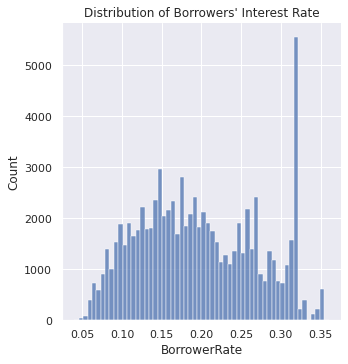

In [18]:
sns.displot(loan_data.BorrowerRate);
plt.title("Distribution of Borrowers' Interest Rate");

In [19]:
np.mean(loan_data.BorrowerRate)

0.19607806833988511

In [20]:
np.median(loan_data.BorrowerRate)

0.1875

##### Distribution of ProsperScore 

Prosper Scores are a custom risk score built by Proper. The score ranges from 1-11, with 11 being the best score. 

We observe that the **most common score is 4 and the least common score is 1**. 

<AxesSubplot:>

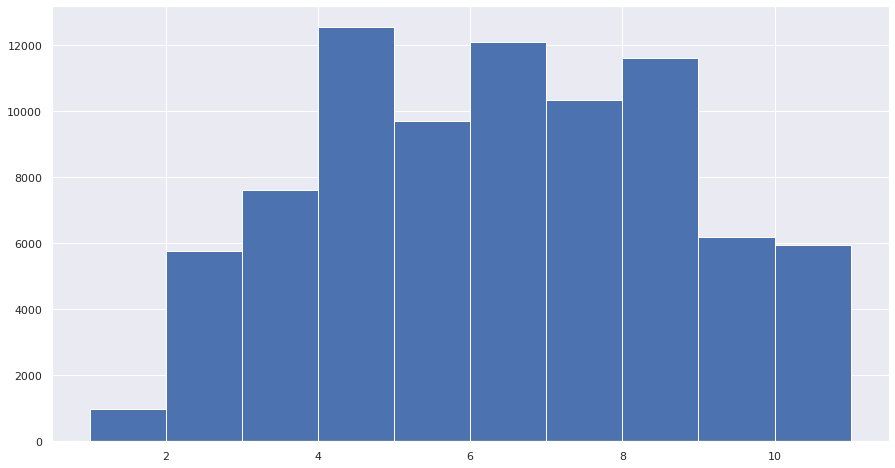

In [21]:
loan_data.ProsperScore.hist()

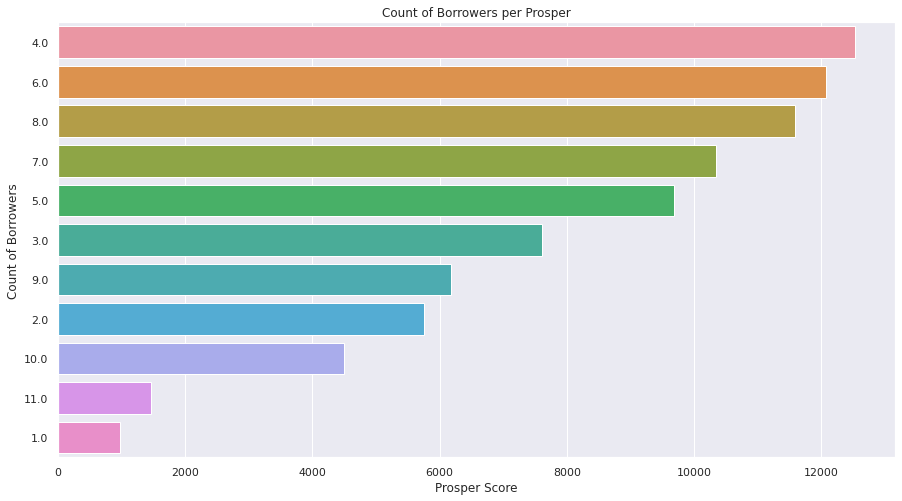

In [22]:
ordered_countplot("ProsperScore", "Count of Borrowers per Prosper", "Prosper Score", "Count of Borrowers")

##### Distribution of CreditScores

The values representing the range of the borrower's credit score as provided by a consumer credit rating agency.

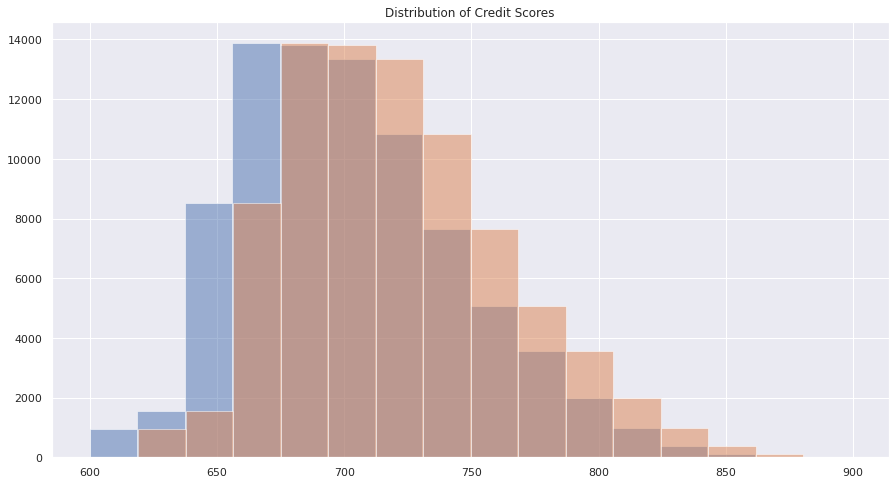

In [23]:
loan_data.CreditScoreRangeLower.hist(alpha = 0.5, bins=15)
loan_data.CreditScoreRangeUpper.hist(alpha = 0.5, bins=15)
plt.title('Distribution of Credit Scores');

##### How are Loan Terms Distributed  Across the Data Set

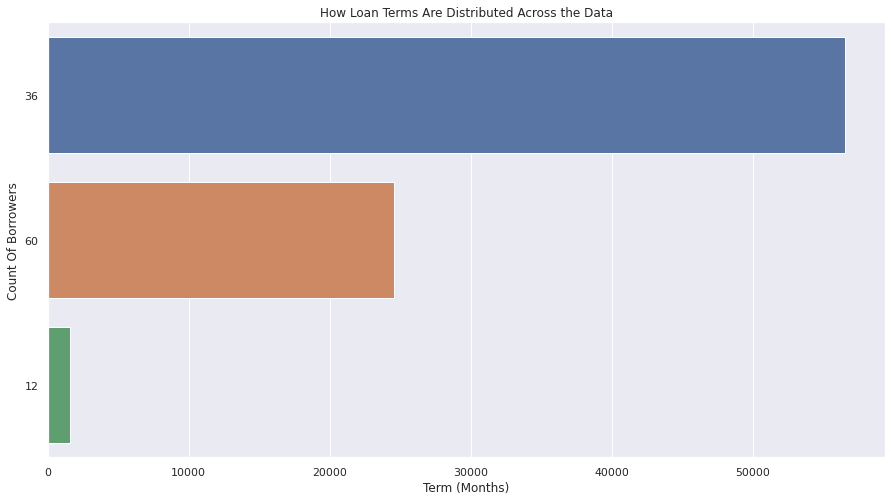

In [24]:
ordered_countplot("Term", "How Loan Terms Are Distributed Across the Data",'Term (Months)' , "Count Of Borrowers")

*Loan's are given out in three time frames. 12 Months, 36 Months and 60 Months. The most popular term is 36 months by a considerable margin.*

##### How are loan amounts distributed across the dataset.

The Loan amounts in the data range from `$1000` to `$35000`. With median being around `$8000`.

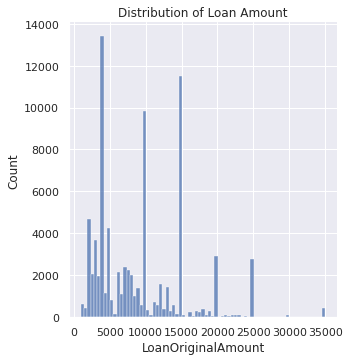

In [25]:
sns.displot(loan_data.LoanOriginalAmount)
plt.title("Distribution of Loan Amount");

In [26]:
loan_data.LoanOriginalAmount.describe()

count    82675.000000
mean      9206.671086
std       6288.827760
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

#### Occupation of Borrowers

Most borrowers in the data gave information about their professions. We observe that the highest occuring profession reported, outside of `Other` and `Generic` is perharps surprisingly `Executive`. And the least occuring profession is `Student`.

In [27]:
#remove all missing occupation
complete = loan_data[~loan_data.Occupation.isna()]

#count of top professions and least professions
top_professions  = complete.Occupation.value_counts().head(10)
least_professions = complete.Occupation.value_counts().tail(10)

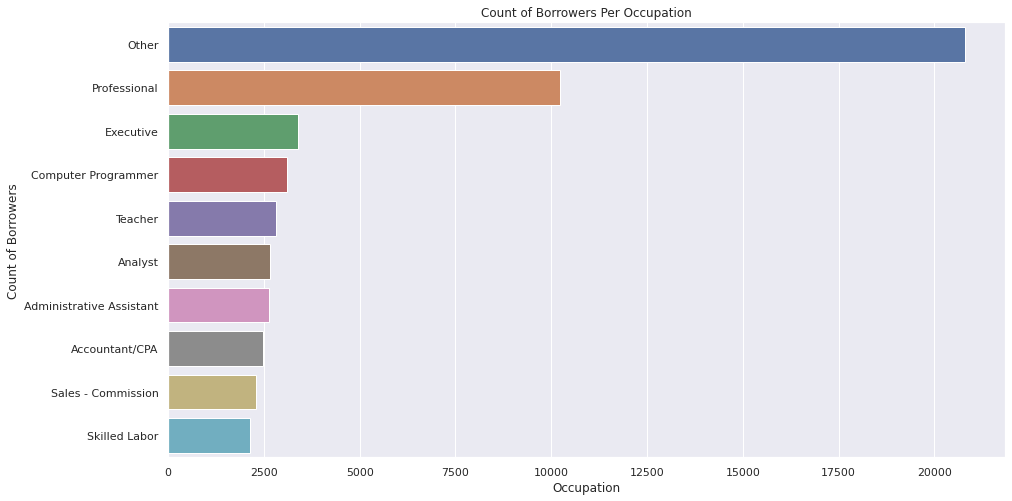

In [28]:
sns.barplot(y=top_professions.index, x=top_professions)
plt.xlabel("Occupation")
plt.ylabel("Count of Borrowers")
plt.title("Count of Borrowers Per Occupation");

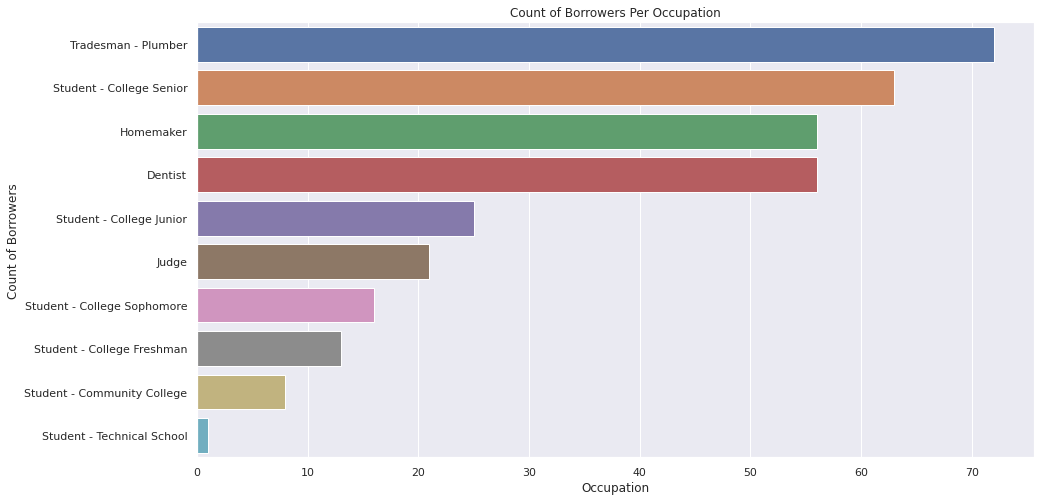

In [29]:
sns.barplot(y=least_professions.index, x=least_professions)
plt.xlabel("Occupation")
plt.ylabel("Count of Borrowers")
plt.title("Count of Borrowers Per Occupation");

### Bivariate Exploration

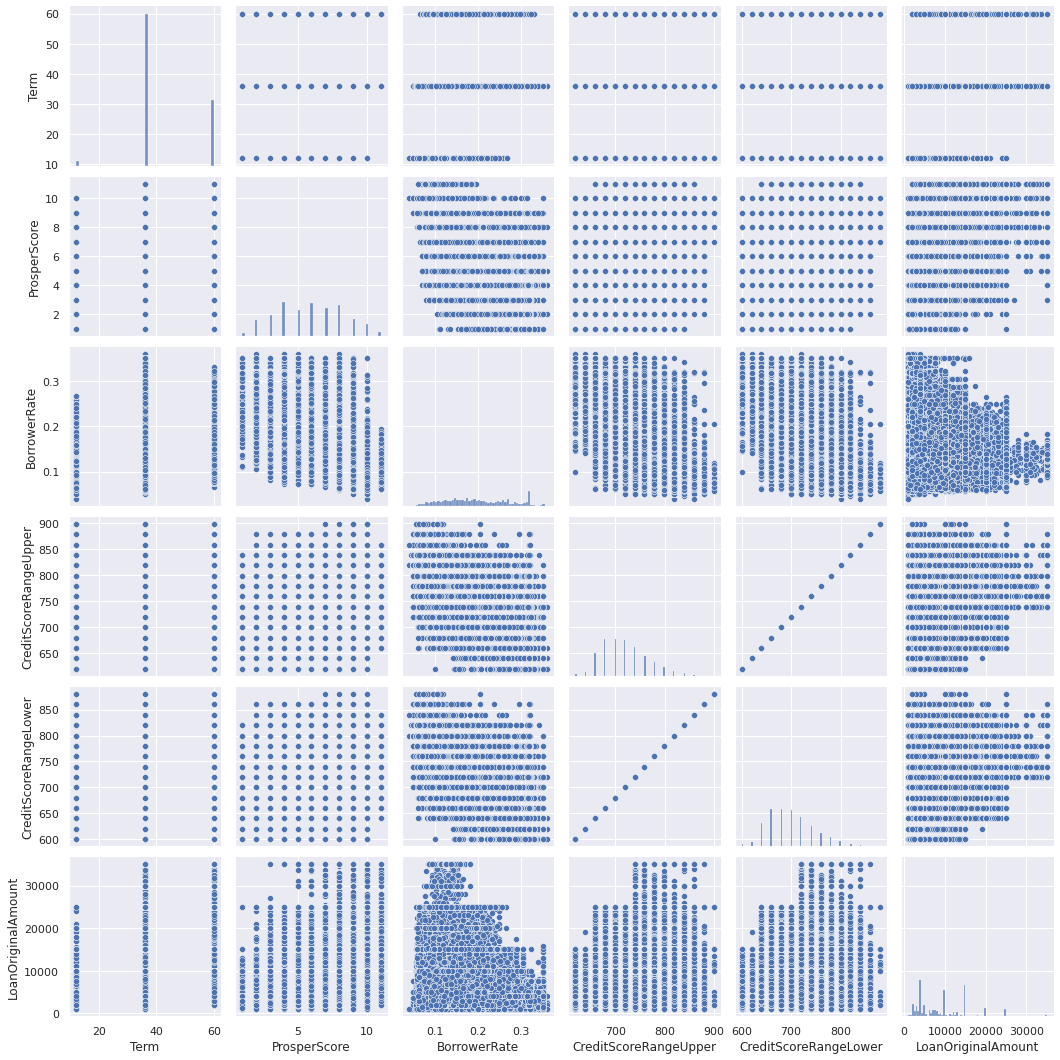

In [30]:
sns.pairplot(loan_data[['Term', 'ProsperScore', 'BorrowerRate', 'CreditScoreRangeUpper', 'CreditScoreRangeLower', 'LoanOriginalAmount']]);

***Notes***: 
1. We observe that high loan amounts are typically have low Borrower rates.

##### Relationship Between Credit Scores and ProsperScores

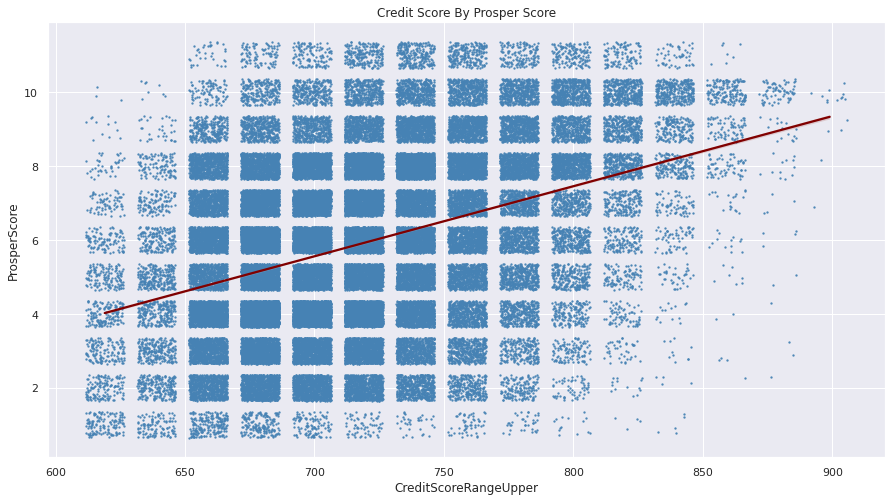

In [54]:
sns.regplot(x="CreditScoreRangeUpper", y="ProsperScore", data=loan_data, 
              color= 'steelblue', x_jitter=7.35, y_jitter = 0.35, scatter_kws={'s':2},line_kws = {'color': 'maroon'})
plt.title("Credit Score By Prosper Score");

##### Distribution of Loans Per Occupation

Here we would see how loans are distributed across the highes occuring and least occuring occupations.

In [31]:
## Data for Top occuring Professions
top_pro_data = loan_data[loan_data.Occupation.isin(top_professions.index)]

## Data for least occuring professions
least_pro_data = loan_data[loan_data.Occupation.isin(least_professions.index)]

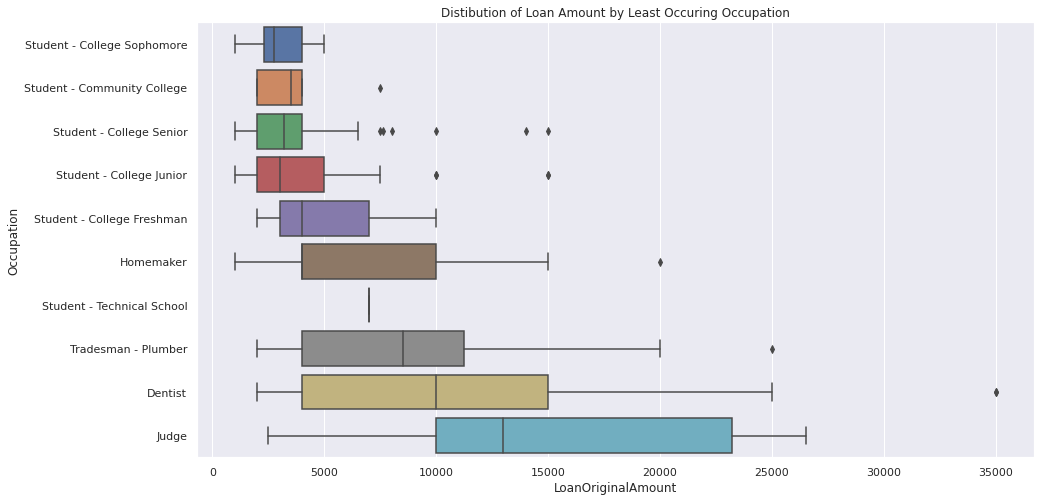

In [32]:
#ordered plot for least occuring professions
ordered_boxplot("Occupation", "LoanOriginalAmount", least_pro_data, "Distibution of Loan Amount by Least Occuring Occupation")

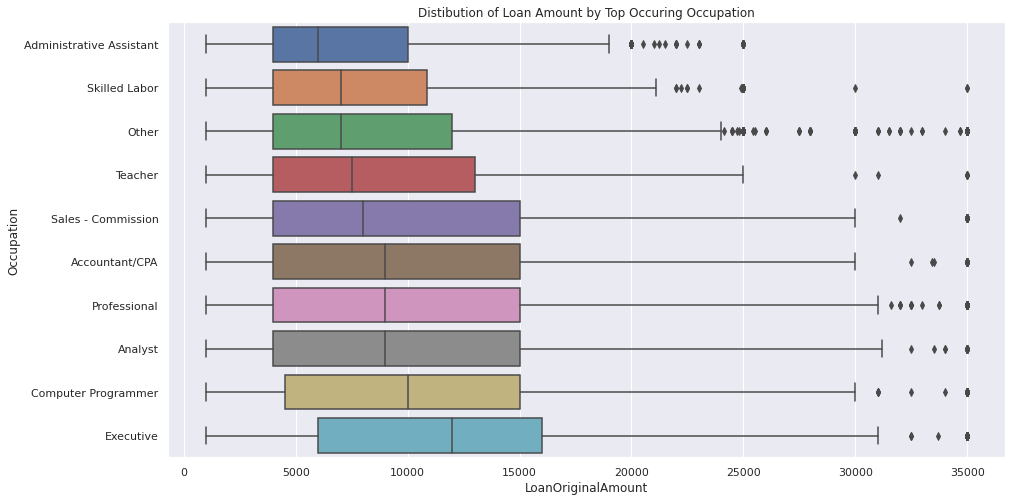

In [33]:
#ordered plot for top occuring professions
ordered_boxplot("Occupation", "LoanOriginalAmount", top_pro_data, "Distibution of Loan Amount by Top Occuring Occupation")

In [34]:
Loan_by_occupation = median_value_per_group('Occupation', 'LoanOriginalAmount')

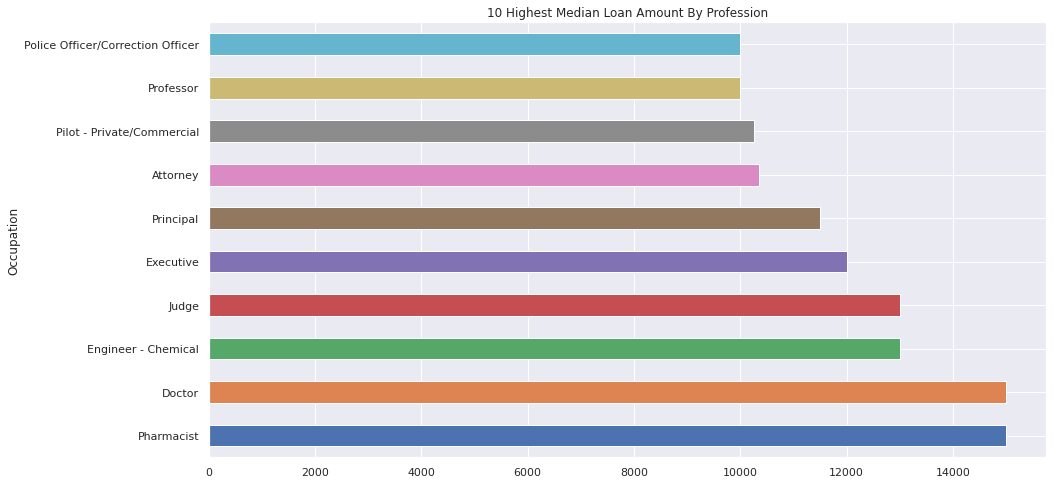

In [43]:
#get the top ten median loan amount
Loan_by_occupation.head(10).plot(kind='barh')
plt.title("10 Highest Median Loan Amount By Profession");

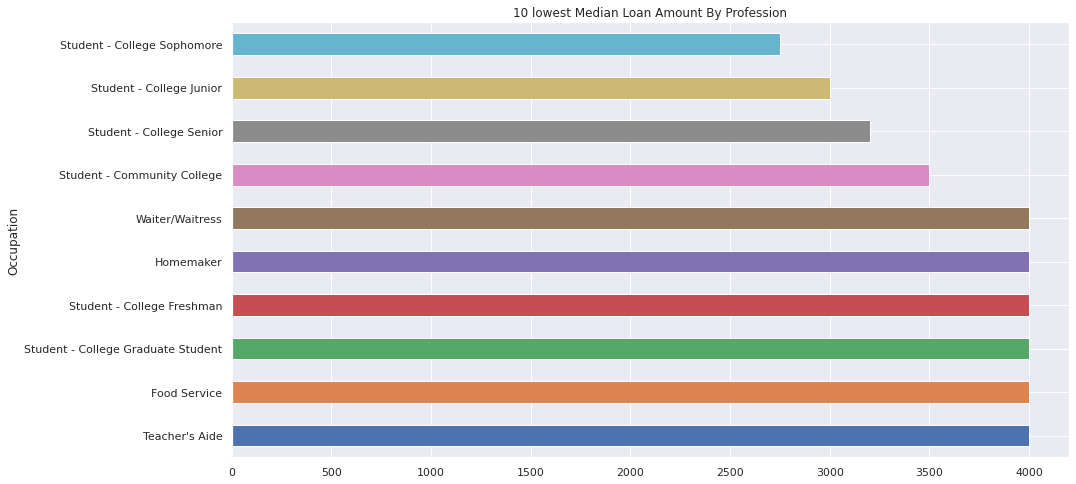

In [44]:
#get the ten lowest median loan amount
Loan_by_occupation.tail(10).plot(kind='barh')
plt.title("10 lowest Median Loan Amount By Profession");

***Note***: We observe that Students generally have in the lowest loan amounts in the data, this could suggest that students might not have access to high loan amounts. However, we cannot exactly tell by looking at the data alone. Nevertheless, we can compare the average prosper scores per occupation, this should give us a clue on how much risk is associated with professions.

##### Credit Scores By Prosper Scores

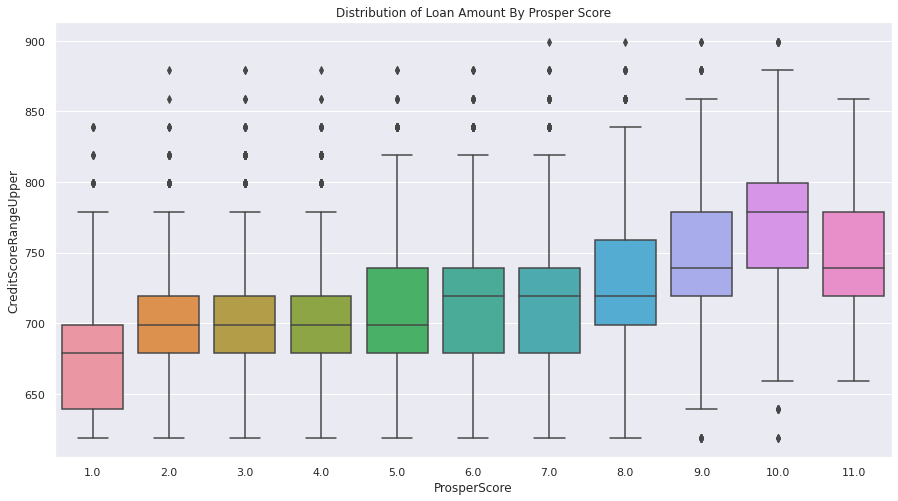

In [46]:
sns.boxplot(x="ProsperScore", y="CreditScoreRangeUpper", data=loan_data)
plt.title("Distribution of Loan Amount By Prosper Score");

##### Loan Amount By Prosper Scores 
Here we compare Loan Amounts by prosper scores. With the use of two visualisations. We observe a relationship between prosper scores and loan amount but this relationship is not linear. On higher prosper scores have higher loan terms on average.

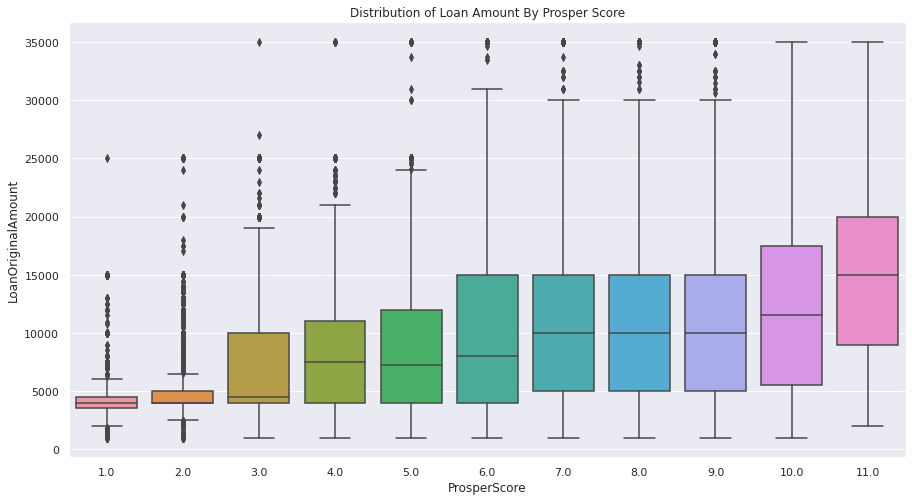

In [38]:
sns.boxplot(y="LoanOriginalAmount", x="ProsperScore", data=loan_data)
plt.title("Distribution of Loan Amount By Prosper Score");

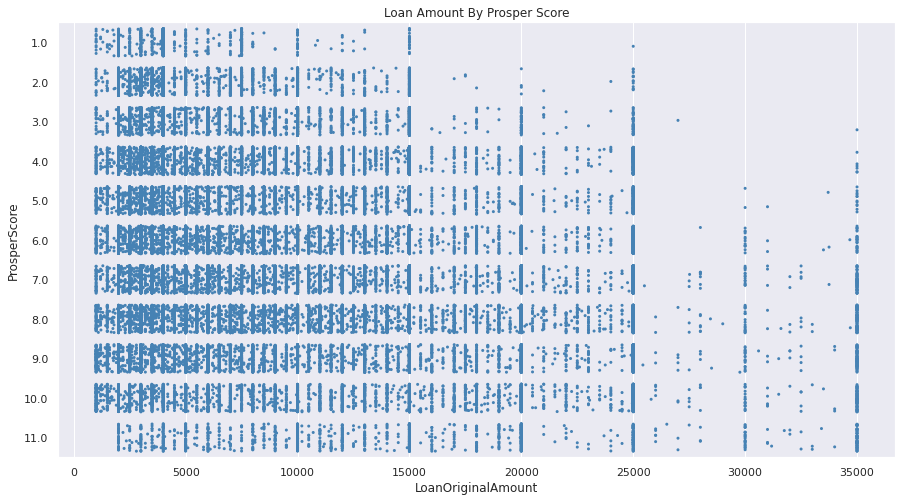

In [47]:
sns.stripplot(x="LoanOriginalAmount", y="ProsperScore", data=loan_data, orient ='h', color= 'steelblue', jitter=0.35, size = 3)
plt.title("Loan Amount By Prosper Score");

In [40]:
# Correlation Score
loan_data[["LoanOriginalAmount", "ProsperScore"]].corr().iloc[0,1]

0.2912802532716324

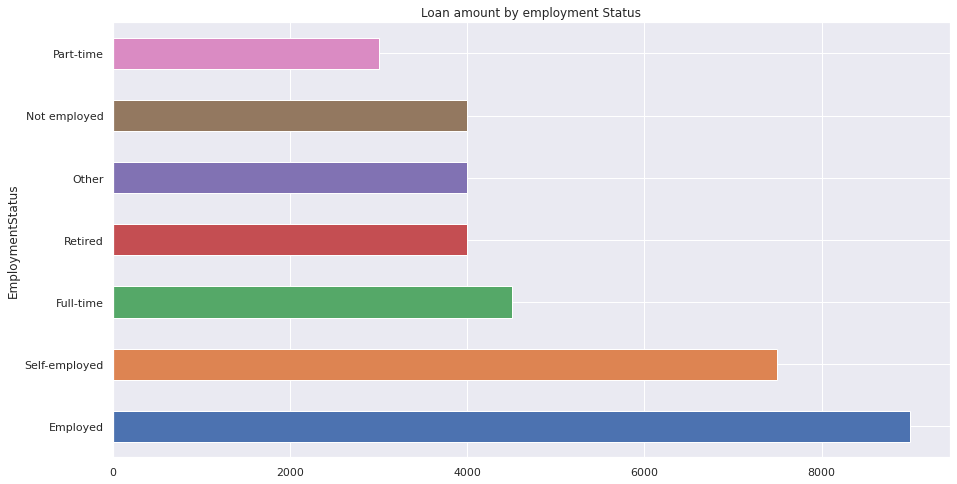

In [48]:
loan_amount_by_employment = median_value_per_group('EmploymentStatus', 'LoanOriginalAmount')
loan_amount_by_employment.plot(kind='barh')
plt.title("Loan amount by employment Status");

##### The relationship between prosper scores and credit scores

In the pairplot, we observe the relationship between prosperscores and CreditScores. However, we want to zoom in on this by 

## Multivarite Exploration

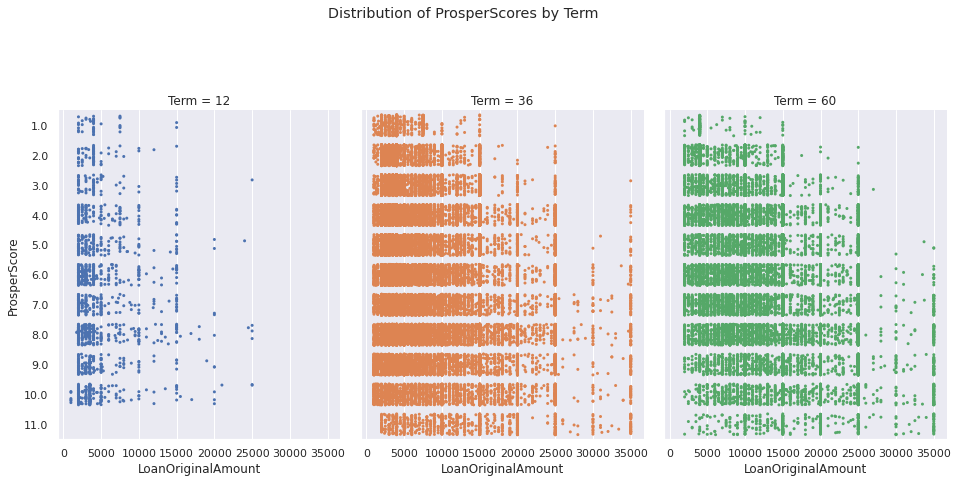

In [50]:
g = sns.FacetGrid(loan_data, col="Term", hue='Term')
g.map(sns.stripplot,"LoanOriginalAmount", "ProsperScore", jitter = 0.35, orient="h", size=3, order=None)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of ProsperScores by Term')
g.fig.set_size_inches(14, 8);

**Note**: Here we observe that lower prosper scores below 3 rarely have loan amounts above 30000. Futhermore, we observe that 12-month loan terms where max out around 25000

## Conclusions

We examined data after the 2009 when the prosper scores were created. We found several interesting insights such as:

1. Loan terms are usually one of three periods: 12 months, 36 months, and 60 months.

2. While Prosper Scores seem to have a relationship with traditional credit scores, it doesn't seem to be perfectly linear i.e A higher credit score doesn't always correspond with a high prosper score. A more indepth analysis will be needed to conclude on what factors directly impact prosper scores.

3. Prosper scores also tend to have a relationship with loan amount i.e Low prosper scores have rarely have high loan amounts. Though this relationship is not linear.

4. We also observe that high loan amounts are really given out in for short loan terms, we observed that 12-month loan terms maxed out around 25000.

5. While we can not make definitive conclusions on whether some occupations tend to borrow more, we observe that the highest number of individual loans in our dataset come from executives. Additionally we note that the highest median loan amounts where taken out by Pharmacists.

6. Borrowers' rate seems to range from *5%* to *35%*. With the most common interest rate around *35%*, and the median interest rate around *18.95%*.

**Note:** In order to make conclusions on the difference between borrower groups(i.e occupation) we would need to perform statistical testing. 